In [2]:
from pyscf import gto, scf, mp, cc, dft
import numpy as np
import ase
import ase.visualize

from matplotlib import pyplot as plt

import pandas as pd
import os
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm

In [3]:
def atoms_wrapper(amon):
    """
    item of amon dict
    """
    coords = []
    elements = ''
    for line in amon[2:]:
        el, x, y, z = line.split()
        coords.append([float(x),float(y),float(z)])
        elements += el
    
    atoms_object = ase.Atoms(elements, coords)
    return(atoms_object)

In [ ]:
amons_dict = uqm.load_obj('/home/misa/datasets/amons_qm9_11k/unique_amons_dict')
ethane_text = amons_dict['CC']
ethane = atoms_wrapper(ethane_text)

### Dihedrals

In [ ]:
ethane_dihedrals = ethane.copy()

In [ ]:
# HCCH dihedral
print(ethane_dihedrals.get_dihedral(2, 0, 1, 7))  # staggered conformation
initial_dihedral = ethane_dihedrals.get_dihedral(2, 0, 1, 7)

conformers = dict()
conformers['angle_0'] = ethane_dihedrals
for d in np.linspace(10, 60, 6):
    new_conformer = ethane_dihedrals.copy()
    new_conformer.set_dihedral(2,0,1,7, initial_dihedral+d, indices=[5,6,7])
    conformers[f'angle_{d}'] = new_conformer
    print(conformers[f'angle_{d}'].get_dihedral(2, 0, 1, 7))
    basepath = '/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/dihedrals/ethane'
    path = os.path.join(basepath, f'dihe_{d}')
    filename = os.path.join(path, f'ethane_dihe_{d}.xyz')
    os.makedirs(path, exist_ok=True)
    ase.io.write(filename, new_conformer, format='xyz')

## Angles

In [6]:
def distort_angles(molecule, distortions, angle_indices, basepath, comp_name):
    mols = []
    for i, d in enumerate(distortions):
        mol_distorted = molecule.copy()
        mol_distorted.set_angle(angle_indices[0], angle_indices[1],angle_indices[2], angle=d, add = True)
        #basepath = '/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/water'
        path = os.path.join(basepath, f'ang_{d}')
        filename = os.path.join(path, f'{comp_name}_ang_{d}.xyz')
        os.makedirs(path, exist_ok=True)
        print(f'angle = {mol_distorted.get_angle(angle_indices[0], angle_indices[1],angle_indices[2])}')
        ase.io.write(filename, mol_distorted, format='xyz')

        mols.append(mol_distorted)
        if d < 0 and distortions[i+1]>0:
            mols.append(molecule)
    return(mols)

#### water

In [4]:
amons_dict = uqm.load_obj('/home/misa/datasets/amons_qm9_11k/unique_amons_dict')
H2O_text = amons_dict['O']
H2O = atoms_wrapper(H2O_text)

In [7]:
d_angle = np.array([-6,-4,-2,2,4,6]) # angle distortion
basepath = '/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/water'
comp_name = 'water'
mols = distort_angles(H2O, d_angle, [0,2,1], basepath, comp_name)

angle = 97.98244129552215
angle = 99.98244129552215
angle = 101.98244129552215
angle = 105.98244129552216
angle = 107.98244129552215
angle = 109.98244129552215


In [8]:
e_pbe = []

for m in mols:

    atom = []
    for a, c in zip(m.get_chemical_symbols(), m.get_positions()):
        atom.append([a, c])

    mol = gto.Mole()
    mol.verbose = 0
    #mol.output = 'H2_{}.log'.format(d)
    mol.atom = atom
    mol.basis = 'def2tzvp'
    mol.build()

    # PBE
    mdft = dft.RKS(mol)
    mdft.xc = 'pbe'
    e_pbe.append(mdft.kernel())

In [10]:
e_pbe

[-76.37576608662097,
 -76.37629301790399,
 -76.37661935499217,
 -76.3767512383946,
 -76.37669499330363,
 -76.37645716303831,
 -76.37604452653179]

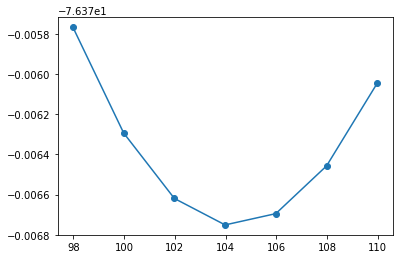

In [9]:
angle=np.array([-6,-4,-2,0,2,4,6])+H2O.get_angle(0,2,1)
plt.plot(angle,e_pbe, '-o')

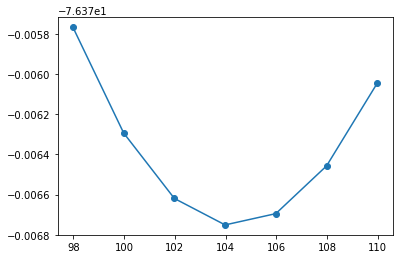

In [10]:
angle=np.array([-6,-4,-2,0,2,4,6])+H2O.get_angle(0,2,1)
plt.plot(angle,e_pbe, '-o')

#### ethene

In [12]:
amons_dict = uqm.load_obj('/home/misa/datasets/amons_qm9_11k/unique_amons_dict')
ethene_text = amons_dict['C=C']
ethene = atoms_wrapper(ethene_text)

##### HCH

In [14]:
#ethene.get_angle(2,0,3)
d_angle = np.array([-4,-2,2,4]) # angle distortion
basepath = '/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/ethene_HCH'
comp_name = 'ethene_HCH'
mols = distort_angles(ethene, d_angle, [2,0,3], basepath, comp_name)

angle = 112.8076847480316
angle = 114.80768474803162
angle = 118.80768474803162
angle = 120.80768474803162


In [15]:
e_pbe = []

for m in mols:

    atom = []
    for a, c in zip(m.get_chemical_symbols(), m.get_positions()):
        atom.append([a, c])

    mol = gto.Mole()
    mol.verbose = 0
    #mol.output = 'H2_{}.log'.format(d)
    mol.atom = atom
    mol.basis = 'def2tzvp'
    mol.build()

    # PBE
    mdft = dft.RKS(mol)
    mdft.xc = 'pbe'
    e_pbe.append(mdft.kernel())

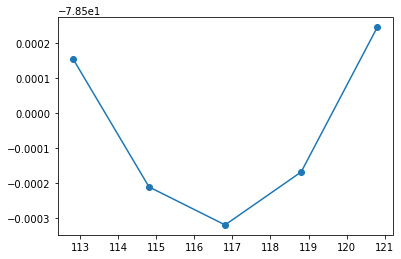

In [17]:
angle=np.array([-4,-2,0,2,4])+ethene.get_angle(2,0,3)
plt.plot(angle,e_pbe, '-o')

#### methane

In [40]:
amons_dict = uqm.load_obj('/home/misa/datasets/amons_qm9_11k/unique_amons_dict')
methane_text = amons_dict['C']
methane = atoms_wrapper(methane_text)

In [45]:
methane.get_angle(0,4,1)

109.46939307262795

In [47]:
indices = [0,4,1]
d_angle = np.array([-4,-2,2,4]) # angle distortion
basepath = '/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/methane_HCH'
comp_name = 'methane_HCH'
mols = distort_angles(methane, d_angle, indices, basepath, comp_name)

angle = 105.46939307262795
angle = 107.46939307262795
angle = 111.46939307262795
angle = 113.46939307262795


In [48]:
e_pbe = []

for m in mols:

    atom = []
    for a, c in zip(m.get_chemical_symbols(), m.get_positions()):
        atom.append([a, c])

    mol = gto.Mole()
    mol.verbose = 0
    #mol.output = 'H2_{}.log'.format(d)
    mol.atom = atom
    mol.basis = 'def2tzvp'
    mol.build()

    # PBE
    mdft = dft.RKS(mol)
    mdft.xc = 'pbe'
    e_pbe.append(mdft.kernel())

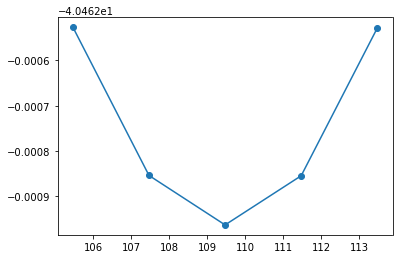

In [49]:
angle=np.array([-4,-2,0,2,4])+methane.get_angle(0,4,1)
plt.plot(angle,e_pbe, '-o')